## Importing the libraries

In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics

!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Load and Prepare Data

In [62]:
dataset = pd.read_csv("train.csv")  # Load Train Dataset
dataset_test = pd.read_csv("test.csv") # Load test data set for lastest step after selecting and training model

## EDA

In [63]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
dataset.shape

(891, 12)

In [67]:
df = dataset.copy()
df_testset = dataset_test.copy()

In [68]:
# Drop some columns that they are Non-functional
df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
df_testset.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)

In [69]:
df.shape

(891, 9)

In [70]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [71]:
# Percentage of missing data for train dataset
round((df.isnull().sum()/df.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [72]:
# Percentage of missing data for test dataset
round((df_testset.isnull().sum()/df_testset.shape[0])*100,2)

Pclass       0.00
Sex          0.00
Age         20.57
SibSp        0.00
Parch        0.00
Fare         0.24
Cabin       78.23
Embarked     0.00
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

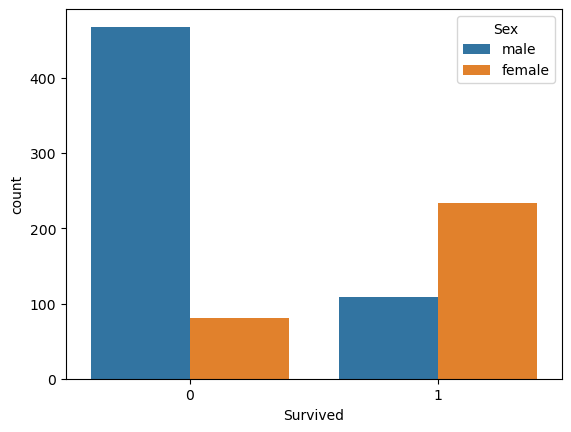

In [73]:
sns.countplot(data=dataset, x="Survived", hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

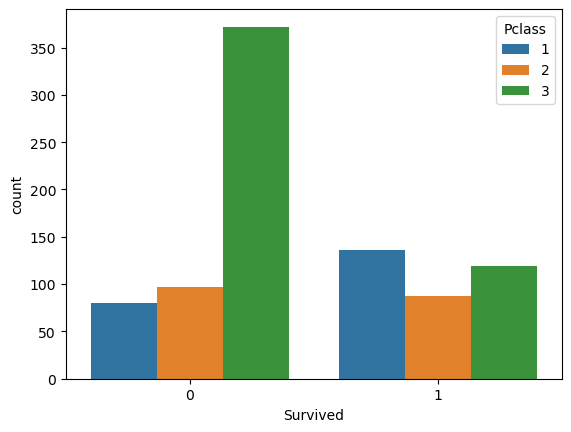

In [74]:
sns.countplot(data=dataset, x="Survived", hue="Pclass")

<Axes: xlabel='Fare', ylabel='Survived'>

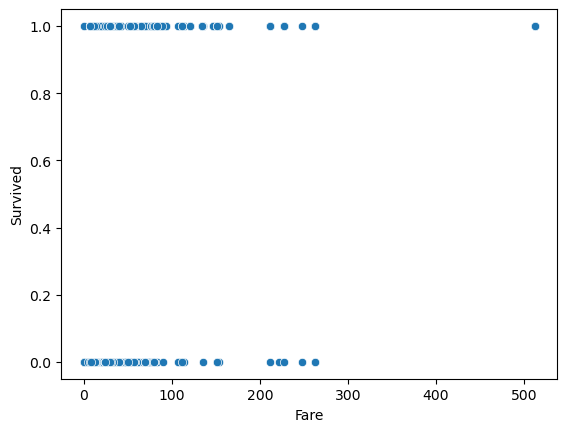

In [75]:
sns.scatterplot(data=dataset, x="Fare", y="Survived")

<Axes: xlabel='Survived', ylabel='count'>

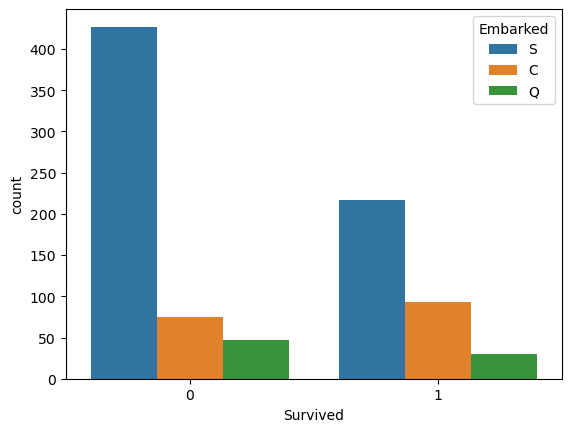

In [76]:
sns.countplot(data=dataset, x="Survived", hue="Embarked")

<Axes: xlabel='Embarked', ylabel='count'>

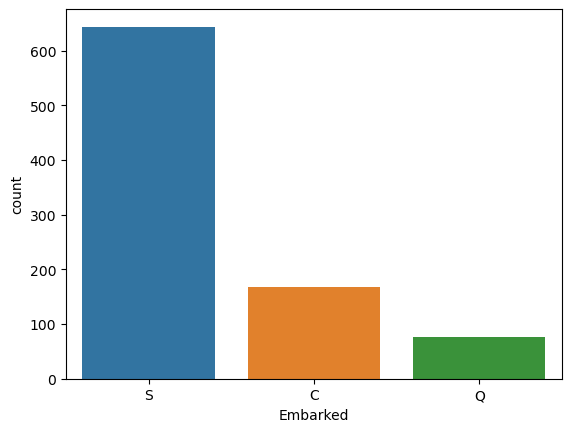

In [77]:
sns.countplot(data=dataset, x="Embarked")

Text(0.5, 1.0, 'Correlation ')

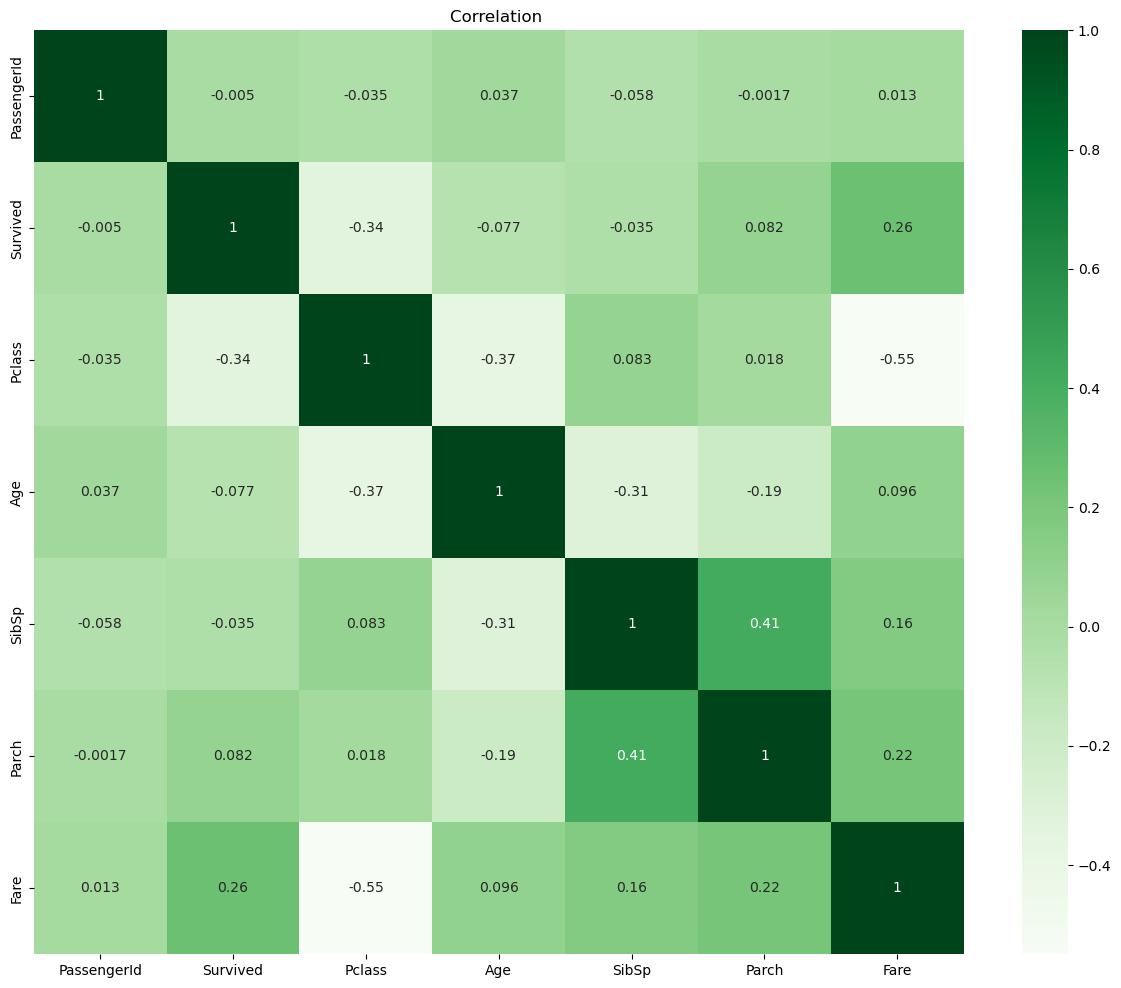

In [78]:
# using corr matrix for finding feauters relation
corr=dataset.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Greens' , annot=True)
r.set_title("Correlation ")

## Data Preprocessing

In [79]:
# drop two rows that their values were Nan in column Embarked
df.dropna(subset=["Embarked"], axis=0, inplace=True)

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [81]:
#drop Cabin column because that column had 77% NaN value
df.drop("Cabin", axis=1, inplace=True)
df_testset.drop("Cabin", axis=1, inplace=True)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [83]:
# Separation of training data into two groups X (features) and Y (labels)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values

In [84]:
df_testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [85]:
# convert X_df_test to array for using next steps
X_df_test = df_testset.iloc[:,:].values

In [86]:
# filling missing values in Age column with SimpleImputer and mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X[:, 2:3] = imputer.fit_transform(X[:, 2:3])

In [87]:
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.64209269662921, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [88]:
# filling missing values in Age column with SimpleImputer and mean strategy
imputer_for_df_testset = SimpleImputer(missing_values=np.nan, strategy="mean")
X_df_test[:, 2:3] = imputer_for_df_testset.fit_transform(X_df_test[:, 2:3])

In [89]:
# encoding categorical data in datasets(I meant Sex and Embarked columns) with OneHotEncoder
col_tf = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 6])], remainder="passthrough")
X = np.array(col_tf.fit_transform(X))
X_df_test = np.array(col_tf.fit_transform(X_df_test))

In [90]:
print(X)

[[0.0 1.0 0.0 ... 1 0 7.25]
 [1.0 0.0 1.0 ... 1 0 71.2833]
 [1.0 0.0 0.0 ... 0 0 7.925]
 ...
 [1.0 0.0 0.0 ... 1 2 23.45]
 [0.0 1.0 1.0 ... 0 0 30.0]
 [0.0 1.0 0.0 ... 0 0 7.75]]


In [91]:
# Spliting train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [92]:
X_train.shape

(666, 10)

In [93]:
y_train.shape

(666, 1)

In [94]:
# Standardization of input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_df_test = scaler.fit_transform(X_df_test)

In [95]:
X_train

array([[ 1.39065478, -1.39065478, -0.48304589, ..., -0.47491664,
        -0.48066298, -0.50010831],
       [ 1.39065478, -1.39065478, -0.48304589, ..., -0.47491664,
        -0.48066298, -0.43539308],
       [-0.71908573,  0.71908573, -0.48304589, ..., -0.47491664,
        -0.48066298, -0.64447307],
       ...,
       [ 1.39065478, -1.39065478, -0.48304589, ..., -0.47491664,
        -0.48066298, -0.12816098],
       [ 1.39065478, -1.39065478, -0.48304589, ...,  1.30201866,
         1.97237569,  0.040015  ],
       [-0.71908573,  0.71908573, -0.48304589, ..., -0.47491664,
        -0.48066298, -0.47214735]])

## Strorytelling - Visualization

<Axes: xlabel='Survived', ylabel='count'>

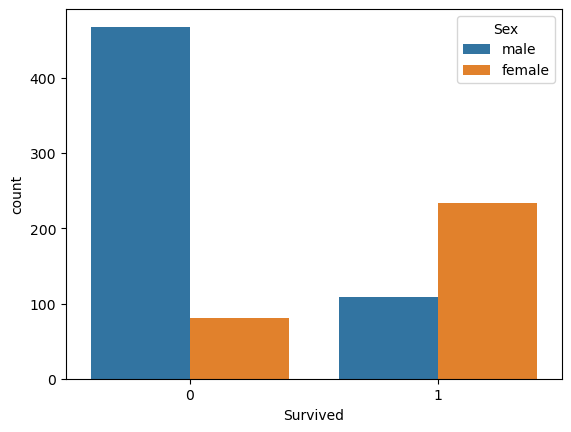

In [96]:
sns.countplot(data=dataset, x="Survived", hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

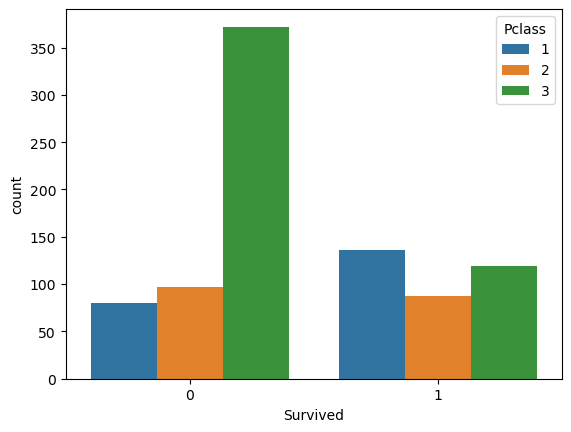

In [97]:
sns.countplot(data=dataset, x="Survived", hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

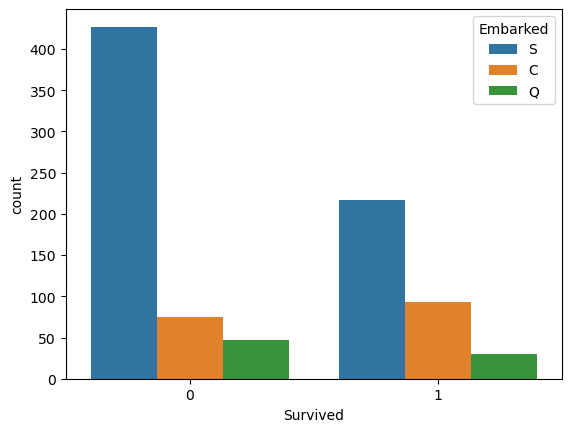

In [98]:
sns.countplot(data=dataset, x="Survived", hue="Embarked")

<Axes: xlabel='Fare', ylabel='Survived'>

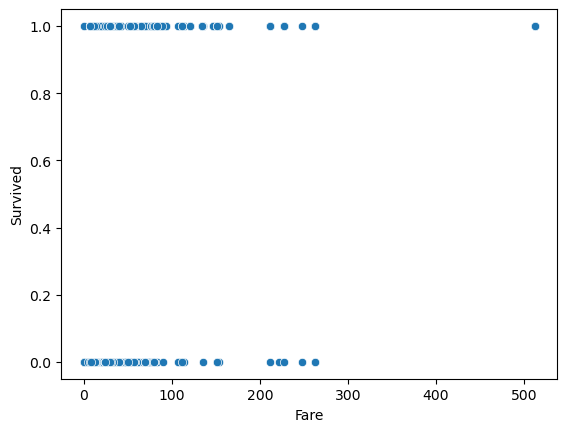

In [99]:
sns.scatterplot(data=dataset, x="Fare", y="Survived")

<Axes: xlabel='Survived', ylabel='count'>

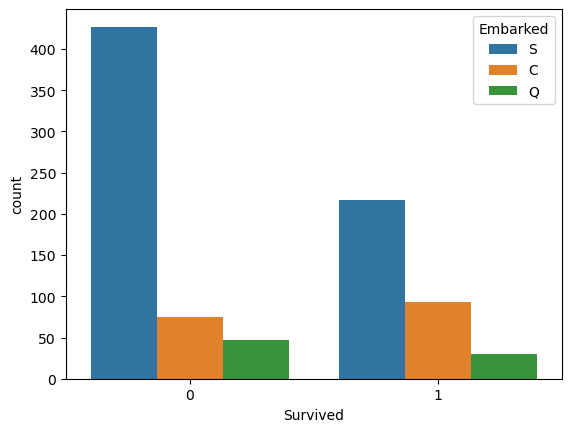

In [100]:
sns.countplot(data=dataset, x="Survived", hue="Embarked")

<Axes: xlabel='Embarked', ylabel='count'>

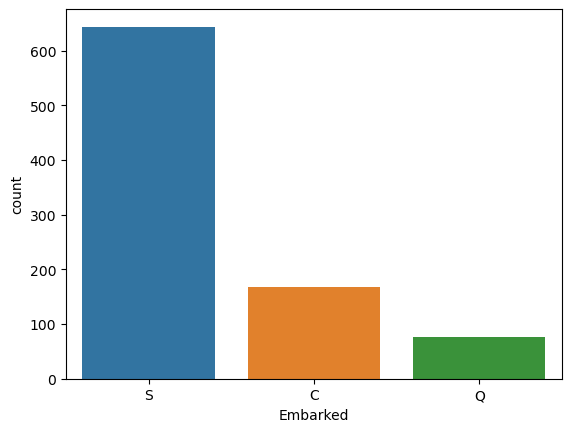

In [101]:
sns.countplot(data=dataset, x="Embarked")

## Train your model (Classification)

In [102]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [103]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
print("Accuracy of the XGBoost Model: ",accuracy_xgb)

Accuracy of the XGBoost Model:  82.51121076233184


In [104]:
#Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [105]:
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of the Support Vector Machine Model: ",accuracy_svm)

Accuracy of the Support Vector Machine Model:  82.51121076233184


In [106]:
# Train ANN model with tesorflow
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=10, activation='relu')) # add first hidden layer
ann_model.add(tf.keras.layers.Dense(units=10, activation='relu')) # add second hidden layer
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # add output layer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compile model
ann_model.fit(X_train, y_train, batch_size = 32, epochs = 100) # train model
y_pred_ann = ann_model.predict(X_test)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.4174
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.5931
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6502
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.6517
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.6802
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7117
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7462
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7613
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7733
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7733
Epoch 11/

In [107]:
# Train model with Logistic Regession
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [108]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100
print("Accuracy of the Logistic Regession Model: ",accuracy_logreg)

Accuracy of the Logistic Regession Model:  78.02690582959642


In [109]:
# Train model with Random Forest
rfc_model = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [110]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc) * 100
print("Accuracy of the Random Forest Model: ",accuracy_rfc)

Accuracy of the Random Forest Model:  77.57847533632287


In [111]:
# Train model with KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [112]:
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print("Accuracy of the KNN Model: ",accuracy_knn)

Accuracy of the KNN Model:  78.9237668161435


### Choosing three of the best accuracy and useing grid search cv for them

Three models, xgboost, support vector machine, and artificial neural network had the best accuracy, so we tune their hyperparameters with grid search and re-examine them in terms of fit and accuracy.

In [113]:
# Selection of several parameters to use in grid search
parameters_for_svm = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [114]:
grid_search_for_svm = GridSearchCV(estimator = svm_model,
                           param_grid = parameters_for_svm,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [115]:
grid_search_for_svm.fit(X_train, y_train)

/home/hamid/anaconda3/envs/ml-mansori/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hamid/anaconda3/envs/ml-mansori/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hamid/anaconda3/envs/ml-mansori/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hamid/anaconda3/envs/ml-mansori/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [116]:
best_accuracy_for_svm = grid_search_for_svm.best_score_
print("Best Accuracy for svm model: {:.2f} %".format(best_accuracy_for_svm*100))

Best Accuracy for svm model: 83.64 %


In [117]:
best_params_for_svm = grid_search_for_svm.best_params_
print(f"Best Parameters for svm model: {best_params_for_svm}")

Best Parameters for svm model: {'C': 0.75, 'gamma': 0.9, 'kernel': 'rbf'}


In [118]:
# Selection of several parameters to use in grid search
parameters_for_xgb = [{'n_estimators': [100, 200],
             'gamma': [0, 0.25, 0.5], 
             'learning_rate': [0.01, 0.7, 0.1, 0.15, 0.2],
             "reg_lambda": [0, 10, 15, 20, 25, 50],          
             "max_depth": [1, 3, 5, 7, 10]}]

In [119]:
grid_search_for_xgb = GridSearchCV(estimator = xgb_model,
                           param_grid = parameters_for_xgb,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [120]:
grid_search_for_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'gamma': [0, 0.25, 0.5],
                          'learning_rate': [0.01, 0.7, 0.1, 0.15, 0.2],
                          'max_depth': [1, 3, 5, 7, 10],
                          'n_estimators': [100, 200],
                          'reg_lambda': [0, 10, 15, 20, 25, 50]}],
             scoring='accuracy')

In [121]:
best_accuracy_for_xgb = grid_search_for_xgb.best_score_
print("Best Accuracy for xgb model: {:.2f} %".format(best_accuracy_for_xgb*100))

Best Accuracy for xgb model: 84.24 %


In [122]:
best_params_for_xgb = grid_search_for_xgb.best_params_
print(f"Best Parameters for xgb model: {best_params_for_xgb}")

Best Parameters for xgb model: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_lambda': 15}


## Test Result

All three models had approximately the same accuracy. 
So, we measure their accuracy for the test data and choose the model with the least overfit.

In [123]:
# Training models with parameters obtained from Grid Search 
svm_model_final = SVC(kernel="rbf", gamma=0.9, C=0.75)
svm_model_final.fit(X_train, y_train)
y_pred_svm_final_for_test_data = svm_model_final.predict(X_test)
y_pred_svm_final_for_train_data = svm_model_final.predict(X_train)

In [124]:
# Accuracy calculation for test and train data
accuracy_svm_for_test_data = accuracy_score(y_test, y_pred_svm_final_for_test_data) * 100
print("Accuracy for test data of the Support Vector Machine Model: ",accuracy_svm_for_test_data)
accuracy_svm_for_train_data = accuracy_score(y_train, y_pred_svm_final_for_train_data) * 100
print("Accuracy for train data of the Support Vector Machine Model: ",accuracy_svm_for_train_data)

Accuracy for test data of the Support Vector Machine Model:  78.47533632286996
Accuracy for train data of the Support Vector Machine Model:  87.98798798798799


In [125]:
# Training models with parameters obtained from Grid Search 
xgb_model_final = XGBClassifier(n_estimators=100, gamma=0, learning_rate=0.1, max_depth=10, reg_lambda=15)
xgb_model_final.fit(X_train, y_train)
y_pred_xgb_final_for_test_data = xgb_model_final.predict(X_test)
y_pred_xgb_final_for_train_data = xgb_model_final.predict(X_train)

In [126]:
# Accuracy calculation for test and train data
accuracy_xgb_for_test_data = accuracy_score(y_test, y_pred_xgb_final_for_test_data) * 100
print("Accuracy for test data of the XGBoost Model: ",accuracy_xgb_for_test_data)
accuracy_xgb_for_train_data = accuracy_score(y_train, y_pred_xgb_final_for_train_data) * 100
print("Accuracy for train data of the XGBoost Model: ",accuracy_xgb_for_train_data)

Accuracy for test data of the XGBoost Model:  81.16591928251121
Accuracy for train data of the XGBoost Model:  90.69069069069069


In [127]:
from tensorflow.keras.regularizers import l2  # Import L2 Regularizition for regularaz model
ann_model_final = tf.keras.models.Sequential()
ann_model_final.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=l2(0.025))) # add first hidden layer
ann_model_final.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=l2(0.025))) # add second hidden layer
ann_model_final.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=l2(0.025))) # add third hidden layer
ann_model_final.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # add output layer
ann_model_final.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy']) # compile model
ann_model_final.fit(X_train, y_train, batch_size = 64, epochs = 100) # train model
train_probs = ann_model_final.predict(X_train) # Obtain probability to calculate accuracy
train_pred = (train_probs > 0.5).astype(int) # Probabilities higher than half fall into category one
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
test_probs = ann_model_final.predict(X_test)
test_pred = (test_probs > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 1.9506 - accuracy: 0.6126
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.8304 - accuracy: 0.6111
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 1.7275 - accuracy: 0.6096
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 1.6365 - accuracy: 0.6081
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 1.5525 - accuracy: 0.6096
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 1.4747 - accuracy: 0.6111
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 1.4023 - accuracy: 0.6126
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 1.3337 - accuracy: 0.6141
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 1.2694 - accuracy: 0.6246
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 1.2079 - accuracy: 0.6562
Epoch 11/

So, we select the ANN model because it has lowest Overfitting

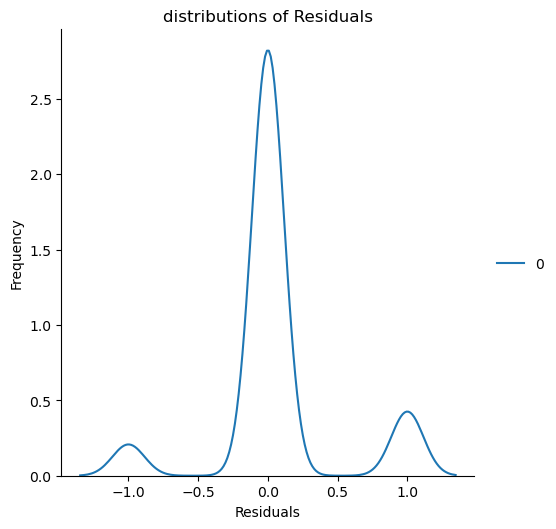

In [128]:
sns.displot(y_train - train_pred, kind="kde")
plt.title("distributions of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [129]:
# Predict dataset_test with ANN model
test_probs_for_df_test = ann_model_final.predict(X_df_test)
test_pred_for_df_test = (test_probs_for_df_test > 0.5).astype(int)

14/14 [==============================] - 0s 907us/step


In [130]:
data_final = pd.DataFrame(test_pred_for_df_test, columns=["Predicting survival"])

In [131]:
data_final

,Predicting survival
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [136]:
# load my final file result
sampleSubmission = pd.read_csv("sampleSubmission.csv")

sampleSubmission
# concat the predict result with date time
sampleSubmission = pd.concat([sampleSubmission, data_final], axis=1)
sampleSubmission

,PassengerId,Survived,Predicting survival
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,0
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [137]:
train_accuracy_for_data_final = accuracy_score(sampleSubmission["Survived"], sampleSubmission["Predicting survival"])
print(f'Accuracy for sampleSubmission: {train_accuracy_for_data_final * 100:.2f}%')

Accuracy for sampleSubmission: 94.98%


In [138]:
sampleSubmission.to_csv("sampleSubmission.csv")